<a href="https://colab.research.google.com/github/m-aliabbas/EvolutionaryComputing/blob/master/AlexNetPreTrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import fastai
from fastai.vision import *
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
from zipfile import ZipFile 
def unZip(file_name):
  with ZipFile(file_name, 'r') as zip: 
      zip.extractall() 
      print('Done!') 

In [0]:
!rm -rf chest_xray
!rm -rf dataset1

In [0]:
file_name = '/content/drive/chestXRay.zip'

In [0]:
path="/content/drive/My Drive/"
file_name=path+'chestXRay.zip'

In [10]:
unZip(file_name)

Done!


In [11]:
!ls chest_xray

ls: cannot access 'chest_xray': No such file or directory


In [12]:
!ls

chest_xray.zip	drive  __MACOSX  sample_data


In [13]:
unZip('chest_xray.zip')

Done!


In [14]:
!ls chest_xray

test  train  val


In [0]:
import glob
import cv2
import numpy as np
%matplotlib inline
filesPos= sorted(glob.glob('chest_xray/train/NORMAL/*.jpeg'))
filesNeg=sorted(glob.glob('chest_xray/train/PNEUMONIA/*.jpeg'))

In [16]:
print(len(filesPos),len(filesNeg))

1341 3875


In [0]:
from fastai import *
import shutil
def copyfiles(filesName,dest):
  c=0
  for file in filesName:
    shutil.copy(file, dest)
    c+=1
  print("Copied "+str(c))

In [0]:
!mkdir dataset1

In [0]:
!mkdir dataset1/train

In [20]:
!ls dataset1

train


In [0]:
!mkdir dataset1/train/PNEUMONIA
!mkdir dataset1/train/NORMAL

In [22]:
!ls dataset1/train/

NORMAL	PNEUMONIA


In [0]:
filesNeg=filesNeg[:1340]

In [0]:
import random 
random.seed(3000)
random.shuffle(filesNeg)
random.shuffle(filesPos)

In [25]:
!ls chest_xray

test  train  val


In [26]:
copyfiles(filesPos,'dataset1/train/NORMAL')

Copied 1341


In [27]:
copyfiles(filesNeg,'dataset1/train/PNEUMONIA')

Copied 1340


In [0]:
!mkdir dataset1/valid

In [0]:
!mkdir dataset1/test

In [0]:
!cp -r chest_xray/val dataset1/

In [0]:
!cp -r chest_xray/test dataset1/

In [0]:
!rm -rf dataset1/valid

In [0]:
!mv dataset1/val dataset1/valid

In [0]:
np.random.seed(1234)
path='dataset1'
data = ImageDataBunch.from_folder(path,
        ds_tfms=get_transforms(do_flip=True,max_lighting=0.1),
        seed=1234,
        valid_pct=0.2,                          
        size=224,
        num_workers=8,
        bs=32,
        test="test")


In [35]:
data

ImageDataBunch;

Train: LabelList (2657 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: dataset1;

Valid: LabelList (664 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,NORMAL,NORMAL
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1

In [36]:
data.classes

['NORMAL', 'PNEUMONIA']

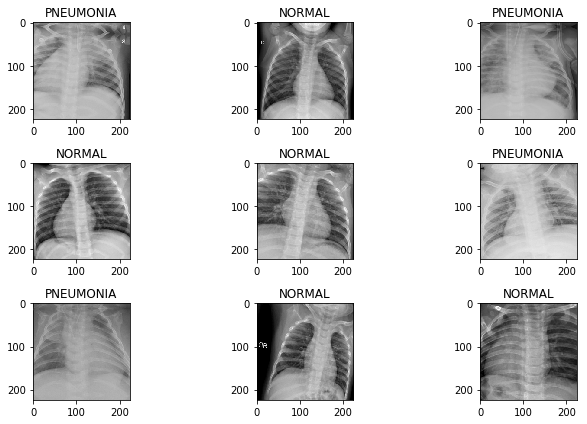

In [37]:
data.show_batch(rows=3, figsize=(10,6), hide_axis=False)

In [0]:
from sklearn.metrics import roc_auc_score,f1_score
def f1_score_a(y_pred,y_true,tens=True):
#     score=roc_auc_score(y_true,torch.sigmoid(y_pred)[:,1])
    f1a_score=f1_score(y_true, np.round(torch.sigmoid(y_pred)[:,1]), average='macro') 
    if tens:
#         score=tensor(score)
        f1a_score=tensor(f1a_score)
    else:
        f1a_score=f1a_score
    return f1a_score
# from sklearn.metrics import f1_score
# def f1_out(y_ture,y_pred,tens=True):
#     f1a_score=f1_score(y_true, torch.sigmoid(y_pred)[:,1], average='macro') 
#     if tens:
#         f1a_score=tensor(f1a_score)
#     else:
#         f1a_score=f1a_score
#     return f1a_score

In [44]:

import torch 
import torchvision
alexnet = torchvision.models.alexnet(pretrained=True)
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [0]:
alexnet=alexnet.cuda()

In [0]:

auc=[]
loss=[]
aucc=[]
learn = Learner(data, alexnet, metrics=[error_rate, accuracy,f1_score_a])

In [48]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (2657 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: dataset1;

Valid: LabelList (664 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,NORMAL,NORMAL
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1, model=AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, str

In [49]:
from fastai.callbacks import *
learn.fit_one_cycle(10,0.0003,callbacks=[SaveModelCallback(learn, every='imrpovement', monitor='f1_score_a')])

/usr/local/lib/python3.6/dist-packages/fastai/callbacks/tracker.py:83: UserWarning: SaveModel every imrpovement is invalid, falling back to "improvement".
  warn(f'SaveModel every {self.every} is invalid, falling back to "improvement".')


epoch,train_loss,valid_loss,error_rate,accuracy,f1_score_a,time
0,0.952172,0.277817,0.114458,0.885542,0.335111,02:25
1,0.410668,0.238469,0.079819,0.920181,0.335111,02:24
2,0.302183,0.349434,0.140060,0.859940,0.335111,02:23
3,0.236370,0.136047,0.046687,0.953313,0.335111,02:23
4,0.193366,0.105556,0.039157,0.960843,0.335111,02:23
5,0.183560,0.085501,0.027108,0.972892,0.335111,02:23
6,0.148739,0.108440,0.037651,0.962349,0.363637,02:23
7,0.129866,0.083657,0.027108,0.972892,0.520474,02:22
8,0.112463,0.083579,0.025602,0.974398,0.545464,02:22
9,0.098452,0.091933,0.030120,0.969880,0.585413,02:23


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Better model found at epoch 0 with f1_score_a value: 0.33511051535606384.
Better model found at epoch 6 with f1_score_a value: 0.3636365532875061.
Better model found at epoch 7 with f1_score_a value: 0.5204740166664124.
Better model found at epoch 8 with f1_score_a value: 0.5454640984535217.
Better model found at epoch 9 with f1_score_a value: 0.5854133367538452.


In [0]:
lossArray=[]

lossArray.append(learn.recorder.losses)

In [0]:
auc=[]
auc.append(learn.recorder.metrics)


In [52]:
auc

[[[tensor(0.1145), tensor(0.8855), tensor(0.3351)],
  [tensor(0.0798), tensor(0.9202), tensor(0.3351)],
  [tensor(0.1401), tensor(0.8599), tensor(0.3351)],
  [tensor(0.0467), tensor(0.9533), tensor(0.3351)],
  [tensor(0.0392), tensor(0.9608), tensor(0.3351)],
  [tensor(0.0271), tensor(0.9729), tensor(0.3351)],
  [tensor(0.0377), tensor(0.9623), tensor(0.3636)],
  [tensor(0.0271), tensor(0.9729), tensor(0.5205)],
  [tensor(0.0256), tensor(0.9744), tensor(0.5455)],
  [tensor(0.0301), tensor(0.9699), tensor(0.5854)]]]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


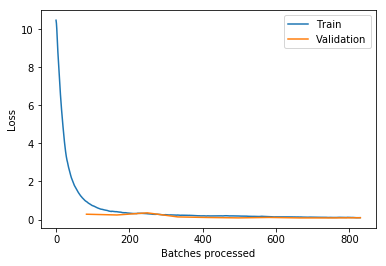

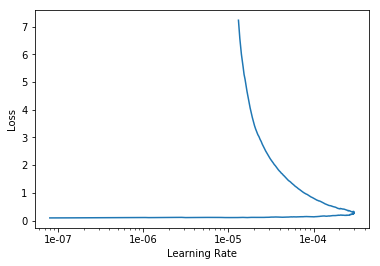

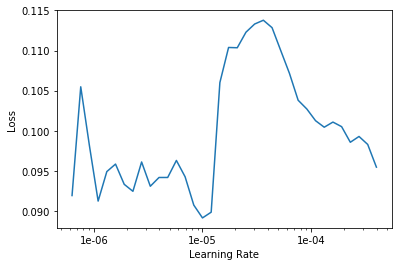

In [53]:

learn.recorder.plot_losses()
learn.recorder.plot(show_momentum=True)
learn.lr_find()
learn.recorder.plot()

In [54]:
learn.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (2657 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: dataset1;

Valid: LabelList (664 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,NORMAL,NORMAL
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1, model=AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, str

In [55]:
learn.unfreeze()
learn.fit_one_cycle(5,callbacks=[SaveModelCallback(learn, every='imrpovement', monitor='f1_score_a')])

/usr/local/lib/python3.6/dist-packages/fastai/callbacks/tracker.py:83: UserWarning: SaveModel every imrpovement is invalid, falling back to "improvement".
  warn(f'SaveModel every {self.every} is invalid, falling back to "improvement".')


epoch,train_loss,valid_loss,error_rate,accuracy,f1_score_a,time
0,0.525876,1.103357,0.390060,0.609940,0.335111,02:23
1,0.680692,0.693573,0.490964,0.509036,0.335111,02:23
2,0.692422,0.693882,0.490964,0.509036,0.335111,02:23
3,0.691874,0.702686,0.490964,0.509036,0.335111,02:23
4,0.692850,0.693225,0.490964,0.509036,0.335111,02:23


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Better model found at epoch 0 with f1_score_a value: 0.33511051535606384.


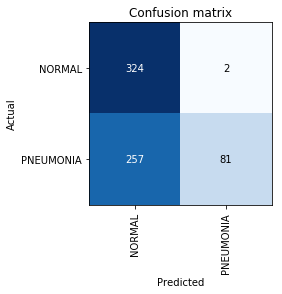

In [0]:

learn.load('bestmodel')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
# learn.load('Res')

In [0]:
# learn.lr_find()
# # learn.recorder.plot()

In [0]:
# learn.fit_one_cycle(20,max_lr=(1e-07),wd=0.25)

In [0]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

In [0]:
# learn.lr_find()

In [0]:
# learn.recorder.plot()

In [57]:
conf=interp.confusion_matrix()
TrueNagitive=conf[0][0]
FalseNegative=conf[0][1]
TruePositive=conf[1][1]
FalsePositive=conf[1][0]
recal=TruePositive/(TruePositive+FalseNegative)
precision=TruePositive/(TruePositive+FalsePositive)
print("Precision of Model =",precision,"Recall of Model ", recal)
f1=2*((precision*recal)/(precision+recal))
print('F1 Score of Model =',f1)

Precision of Model = 0.23964497041420119 Recall of Model  0.9759036144578314
F1 Score of Model = 0.38479809976247026
